# Financial Analysis Examples with Python

This notebook will provide an overview of popular statistical packages in Python including NumPy, statsmodels and SciPy. During the session participants will gain experience in performing statistical analysis, linear regressions, time series forecasting and optimization. The session will also explore some more advanced functions in Pandas, including transforming time series data using the resample, aggregate and rolling functions.

### <font color = 'blue'> **Section 1 - Importing Packages and Data** </font>

In [12]:
import pandas as pd
import numpy as np #log, matrix calculation, random numbers
import matplotlib.pyplot as plt

import statsmodels.api as sm #Linear regression
import statsmodels.tsa as tsa #time series analysis

In [13]:
sp500 = pd.read_csv("StockData/SP500.csv",parse_dates=['Date'],index_col=['Date'])
aapl = pd.read_csv("StockData/AAPL.csv",parse_dates=['Date'],index_col=['Date'])

### <font color = 'blue'> **Section 2 - Linear Regression Model** </font>
- this example will calculate the Beta of Apple against S&P 500 using the CAPM model
- CAPM: return on equity = risk free rate + beta * market risk premium
- For simplicity, we will ignore in this example the risk free rate (assume it has been 0 for the period being analyzed) and perform a regression of AAPL's returns over S&P 500 returns
- The slope of the line of best fit will represent AAPL's beta
- Regression model will be run using OLS from statsmodels package

#### Creating Calculated Fields

In [3]:
#%% Calculating Returns
sp500['Returns'] = sp500['Close'] / sp500['Close'].shift(1) - 1
    #daily return (Close/Prev Close) - 1

aapl['Returns'] = aapl['Close'].pct_change()

#### Merging Data Sets

In [4]:
mergedData = sp500.merge(aapl, how='inner',
                         left_index=True, right_index=True,
                         suffixes=("_SP","_AAPL"))  
mergedData.dropna(inplace=True)
    #same as: mergedData = mergedData.dropna()
mergedData

,Open_SP,High_SP,Low_SP,Close_SP,Adj Close_SP,Volume_SP,Returns_SP,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Adj Close_AAPL,Volume_AAPL,Returns_AAPL
Date,,,,,,,,,,,,,,
2013-10-02,1691.900024,1693.869995,1680.339966,1693.869995,1693.869995,3148600000,-0.000667,69.375717,70.257141,69.107140,69.937141,63.731426,72296000,0.003279
2013-10-03,1692.349976,1692.349976,1670.359985,1678.660034,1678.660034,3279650000,-0.008979,70.072861,70.335716,68.677139,69.058571,62.930801,80688300,-0.012562
2013-10-04,1678.790039,1691.939941,1677.329956,1690.500000,1690.500000,2880270000,0.007053,69.122856,69.228569,68.371429,69.004288,62.881340,64717100,-0.000786
2013-10-07,1687.150024,1687.150024,1674.699951,1676.119995,1676.119995,2678490000,-0.008506,69.508568,70.378571,69.335716,69.678574,63.495800,78073100,0.009772
2013-10-08,1676.219971,1676.790039,1655.030029,1655.449951,1655.449951,3569230000,-0.012332,69.991432,70.091431,68.648575,68.705711,62.609249,72729300,-0.013962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-24,2921.830078,2923.790039,2912.629883,2919.370117,2919.370117,3372210000,-0.003516,216.820007,221.259995,216.630005,220.789993,220.789993,27693400,0.014380
2018-09-25,2921.750000,2923.949951,2913.699951,2915.560059,2915.560059,3285480000,-0.001305,219.750000,222.820007,219.699997,222.190002,222.190002,24554400,0.006341
2018-09-26,2916.979980,2931.149902,2903.280029,2905.969971,2905.969971,3388620000,-0.003289,221.000000,223.750000,219.759995,220.419998,220.419998,23984700,-0.007966


#### Regression Model
Steps:
- pick the model and the x/y variables
- fit the model
- look at the summary results and extract any important results (beta, r2, etc.)
- predict new data set (out of sample), or test old data (in-sample)
- plot predictions

In [5]:
#%% Linear Regression Model
#run the model
#look at the summary results
#predict new data set (out of sample), can test old data (in-sample, backtesting)

#CAPM
# cost of equity = risk free rate + beta * MRP
    #MRP ---> market risk premium = excess returns of the market
    # S&P 500 as a proxy for the market
    
    #simplify assumption --> risk free rate = 0
    #return of AAPL = 0 + beta * MRP
        #MRP = S&P returns - 0

capm = sm.OLS(mergedData['Returns_AAPL'], mergedData['Returns_SP'])
         #  OLS(dependent variable, independ variable)

In [6]:
results = capm.fit()
r2 = results.rsquared
results.summary() 
    #look at the r2
    #beta --> coefficient
    #look for p-stat to be less than 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Returns_AAPL   R-squared (uncentered):                   0.321
Model:                            OLS   Adj. R-squared (uncentered):              0.321
Method:                 Least Squares   F-statistic:                              594.5
Date:                Fri, 01 Oct 2021   Prob (F-statistic):                   7.67e-108
Time:                        12:15:19   Log-Likelihood:                          3810.0
No. Observations:                1258   AIC:                                     -7618.
Df Residuals:                    1257   BIC:                                     -7613.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Returns_SP     1.0363      0.043     24.383      0.000       0.953       1.120
==============================================================================
Omnibus:                      220.041   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3571.548
Skew:                           0.262   Prob(JB):                         0.00
Kurtosis:                      11.238   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
results.params #just the coefficients or betas
# coefficients = results.params

Returns_SP    1.036313
dtype: float64

In [8]:
#Just the beta
beta = results.params[0]
beta

1.036313306900059

#### Predicting New Results

In [9]:
#In-Sample forecast / "Backtesting"
mergedData['Predictions'] = results.predict(mergedData['Returns_SP'])

#Out-of sample forecast --> give your own data set to predict
mergedData

,Open_SP,High_SP,Low_SP,Close_SP,Adj Close_SP,Volume_SP,Returns_SP,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Adj Close_AAPL,Volume_AAPL,Returns_AAPL,Predictions
Date,,,,,,,,,,,,,,,
2013-10-02,1691.900024,1693.869995,1680.339966,1693.869995,1693.869995,3148600000,-0.000667,69.375717,70.257141,69.107140,69.937141,63.731426,72296000,0.003279,-0.000691
2013-10-03,1692.349976,1692.349976,1670.359985,1678.660034,1678.660034,3279650000,-0.008979,70.072861,70.335716,68.677139,69.058571,62.930801,80688300,-0.012562,-0.009305
2013-10-04,1678.790039,1691.939941,1677.329956,1690.500000,1690.500000,2880270000,0.007053,69.122856,69.228569,68.371429,69.004288,62.881340,64717100,-0.000786,0.007309
2013-10-07,1687.150024,1687.150024,1674.699951,1676.119995,1676.119995,2678490000,-0.008506,69.508568,70.378571,69.335716,69.678574,63.495800,78073100,0.009772,-0.008815
2013-10-08,1676.219971,1676.790039,1655.030029,1655.449951,1655.449951,3569230000,-0.012332,69.991432,70.091431,68.648575,68.705711,62.609249,72729300,-0.013962,-0.012780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-24,2921.830078,2923.790039,2912.629883,2919.370117,2919.370117,3372210000,-0.003516,216.820007,221.259995,216.630005,220.789993,220.789993,27693400,0.014380,-0.003643
2018-09-25,2921.750000,2923.949951,2913.699951,2915.560059,2915.560059,3285480000,-0.001305,219.750000,222.820007,219.699997,222.190002,222.190002,24554400,0.006341,-0.001352
2018-09-26,2916.979980,2931.149902,2903.280029,2905.969971,2905.969971,3388620000,-0.003289,221.000000,223.750000,219.759995,220.419998,220.419998,23984700,-0.007966,-0.003409


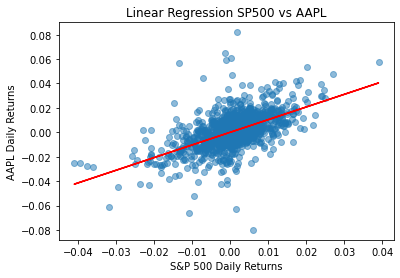

In [10]:
#%% Visualize
plt.plot(mergedData['Returns_SP'],mergedData['Predictions'],'red')
plt.scatter(mergedData['Returns_SP'],mergedData['Returns_AAPL'],alpha=0.5)
plt.title("Linear Regression SP500 vs AAPL")
plt.xlabel("S&P 500 Daily Returns")
plt.ylabel("AAPL Daily Returns")
plt.show()

#### Beta using Monthly Data


In [11]:
sp500 = pd.read_csv("StockData/SP500.csv",parse_dates=['Date'],index_col=['Date'])
aapl = pd.read_csv("StockData/AAPL.csv",parse_dates=['Date'],index_col=['Date'])

rules = {'Open':'first', 'Close':'last', 'Volume':'sum', 'High':'max', 'Low':'min'}
sp500_mo = sp500.resample('M').agg(rules)
aapl_mo = aapl.resample('M').agg(rules)

aapl_mo['Returns'] = aapl_mo['Close'].pct_change()
sp500_mo['Returns'] = sp500_mo['Close'].pct_change()

monthly_data = sp500_mo.merge(aapl_mo, how='outer',
                         left_index=True, right_index=True,
                         suffixes=("_SP","_AAPL")) 

monthly_data.dropna(inplace=True)
monthly_data

,Open_SP,Close_SP,Volume_SP,High_SP,Low_SP,Returns_SP,Open_AAPL,Close_AAPL,Volume_AAPL,High_AAPL,Low_AAPL,Returns_AAPL
Date,,,,,,,,,,,,
2013-11-30,1758.699951,1805.810059,63628190000,1813.550049,1746.199951,0.028049,74.860001,79.438568,1.306289e+09,79.761429,73.197144,0.063842
2013-12-31,1806.550049,1848.359985,64958820000,1849.439941,1767.989990,0.023563,79.714287,80.145714,1.764349e+09,82.162857,76.971428,0.008902
2014-01-31,1845.859985,1782.589966,75871910000,1850.839966,1770.449951,-0.035583,79.382858,71.514282,2.191489e+09,80.028572,70.507141,-0.107697
2014-02-28,1782.680054,1859.449951,69725590000,1867.920044,1737.920044,0.043117,71.801430,75.177139,1.470092e+09,78.741432,71.328575,0.051219
2014-03-31,1857.680054,1872.339966,71885030000,1883.969971,1834.439941,0.006932,74.774284,76.677139,1.250425e+09,78.428574,74.687141,0.019953
2014-04-30,1873.959961,1883.949951,71595810000,1897.280029,1814.359985,0.006201,76.822861,84.298569,1.608765e+09,85.632858,73.047142,0.099396
2014-05-31,1884.390015,1923.569946,63623630000,1924.030029,1859.790039,0.021030,84.571426,90.428574,1.433917e+09,92.024284,82.904289,0.072718
2014-06-30,1923.869995,1960.229980,63283380000,1968.170044,1915.979980,0.019058,90.565712,92.930000,1.206935e+09,95.050003,88.928574,0.027662
2014-07-31,1962.290039,1930.670044,66524690000,1991.390015,1930.670044,-0.015080,93.519997,95.599998,1.035086e+09,99.440002,92.570000,0.028731


<AxesSubplot:xlabel='Returns_SP', ylabel='Returns_AAPL'>

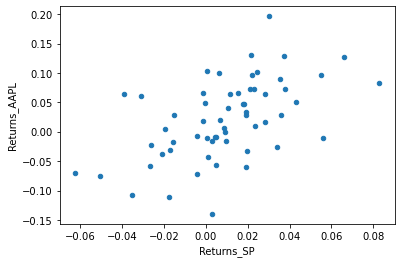

In [12]:
monthly_data.plot.scatter(x='Returns_SP', y='Returns_AAPL')

In [13]:
capm_mo = sm.OLS(monthly_data['Returns_AAPL'], monthly_data['Returns_SP']).fit()
monthly_data['Predictions'] = capm_mo.predict(monthly_data['Returns_SP'])
capm_mo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Returns_AAPL   R-squared (uncentered):                   0.339
Model:                            OLS   Adj. R-squared (uncentered):              0.328
Method:                 Least Squares   F-statistic:                              29.77
Date:                Fri, 24 Sep 2021   Prob (F-statistic):                    1.05e-06
Time:                        02:21:41   Log-Likelihood:                          85.738
No. Observations:                  59   AIC:                                     -169.5
Df Residuals:                      58   BIC:                                     -167.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Returns_SP     1.4207      0.260      5.457      0.000       0.900       1.942
==============================================================================
Omnibus:                        0.727   Durbin-Watson:                   2.487
Prob(Omnibus):                  0.695   Jarque-Bera (JB):                0.202
Skew:                           0.010   Prob(JB):                        0.904
Kurtosis:                       3.286   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

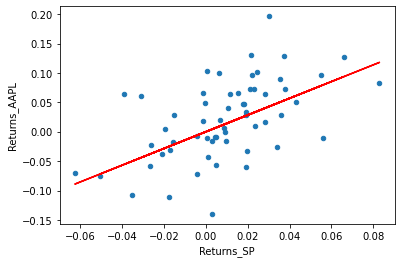

In [14]:
monthly_data.plot.scatter(x='Returns_SP', y='Returns_AAPL')
plt.plot(monthly_data['Returns_SP'],monthly_data['Predictions'],'red')
plt.show()

### <font color = 'blue'> **Section 3 - Time Series Regression** </font>
- this example will run a regression using S&P 500 SMA

In [15]:
sp500 = pd.read_csv("StockData/SP500.csv",parse_dates=['Date'],index_col=['Date'])


#Simple Moving Averages
sp500['sma'] = sp500['Close'].shift(1).rolling(window = 20, min_periods = 5).mean()

sp500['sma_1'] = sp500['Close'].shift(1)
sp500['sma_5'] = sp500['sma_1'].rolling(window = 5, min_periods = 5).mean()
sp500['sma_20'] = sp500['sma_1'].rolling(window = 20, min_periods = 20).mean()
sp500['sma_100'] = sp500['sma_1'].rolling(window = 100, min_periods = 100).mean()
sp500['sma_42'] = sp500['sma_1'].rolling(window = 42, min_periods = 42).mean()
sp500['sma_252'] = sp500['sma_1'].rolling(window = 252, min_periods = 252).mean()

#Exponential Moving Averages
sp500['ema_20'] = sp500['Close'].ewm(span=20).mean()

sp500.head(25)

,Open,High,Low,Close,Adj Close,Volume,sma,sma_1,sma_5,sma_20,sma_100,sma_42,sma_252,ema_20
Date,,,,,,,,,,,,,,
2013-09-30,1687.260010,1687.260010,1674.989990,1681.550049,1681.550049,3308630000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1681.550049
2013-10-01,1682.410034,1696.550049,1682.069946,1695.000000,1695.000000,3238690000,NaN,1681.550049,NaN,NaN,NaN,NaN,NaN,1688.611273
2013-10-02,1691.900024,1693.869995,1680.339966,1693.869995,1693.869995,3148600000,NaN,1695.000000,NaN,NaN,NaN,NaN,NaN,1690.542244
2013-10-03,1692.349976,1692.349976,1670.359985,1678.660034,1678.660034,3279650000,NaN,1693.869995,NaN,NaN,NaN,NaN,NaN,1687.112034
2013-10-04,1678.790039,1691.939941,1677.329956,1690.500000,1690.500000,2880270000,NaN,1678.660034,NaN,NaN,NaN,NaN,NaN,1687.931554
2013-10-07,1687.150024,1687.150024,1674.699951,1676.119995,1676.119995,2678490000,1687.916016,1690.500000,1687.916016,NaN,NaN,NaN,NaN,1685.439855
2013-10-08,1676.219971,1676.790039,1655.030029,1655.449951,1655.449951,3569230000,1685.950012,1676.119995,1686.830005,NaN,NaN,NaN,NaN,1679.769506
2013-10-09,1656.989990,1662.469971,1646.469971,1656.400024,1656.400024,3577840000,1681.592861,1655.449951,1678.919995,NaN,NaN,NaN,NaN,1675.729974
2013-10-10,1660.880005,1692.560059,1660.880005,1692.560059,1692.560059,3362300000,1678.443756,1656.400024,1671.426001,NaN,NaN,NaN,NaN,1678.429602


<AxesSubplot:xlabel='Date'>

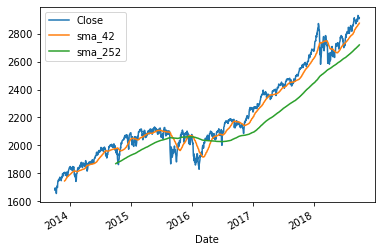

In [16]:
sp500[['Close','sma_42','sma_252']].plot()

In [17]:
sp500.dropna(inplace=True)

# add constant to dataframe
sp500['alpha'] = 1
#regts = sm.OLS(sp500['Close'], sp500[['alpha','sma_1', 'sma_5', 'sma_20','sma_100','ema_20']]).fit()
#regts = sm.OLS(sp500['Close'], sp500[['sma_20', 'ema_20']]).fit()
regts = sm.OLS(sp500['Close'], sp500[['sma_42', 'sma_252']]).fit()
regts.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          9.637e+05
Date:                Fri, 24 Sep 2021   Prob (F-statistic):                        0.00
Time:                        02:22:06   Log-Likelihood:                         -5428.5
No. Observations:                1008   AIC:                                  1.086e+04
Df Residuals:                    1006   BIC:                                  1.087e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sma_42         1.0543      0.024     44.745      0.000       1.008       1.101
sma_252       -0.0474      0.025     -1.931      0.054      -0.096       0.001
==============================================================================
Omnibus:                      110.395   Durbin-Watson:                   0.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.538
Skew:                          -0.782   Prob(JB):                     1.13e-36
Kurtosis:                       4.222   Cond. No.                         64.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

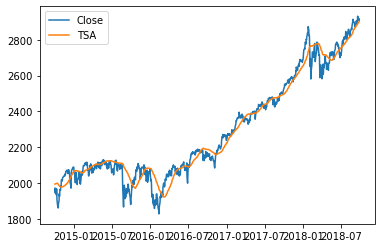

In [18]:
plt.plot(sp500.index, sp500['Close'])
# plt.plot(sp500.index, regts.predict(sp500[['sma_20', 'ema_20']]))
plt.plot(sp500.index, regts.predict(sp500[['sma_42', 'sma_252']]))
plt.legend(['Close','TSA'])
plt.show()

### <font color = 'blue'> **Section 4 - Optimization - SciPy** </font>

In [19]:
#Import Optimization Packages
#from scipy.optimize import minimize, Bounds, LinearConstraint #Only for scipy version >1.0
from scipy.optimize import minimize

In [20]:
#check version of scipy
import scipy
scipy.__version__

'1.6.2'

#### Optimization Function

In [21]:
def optw(w, V):
    # Function returns the variance of the portfolio given weights and covar matrix
    return(np.matmul(np.matmul(w,V),w))

#### Preparing Data Set
Load all the stock data except for the S&P500 data.
- Resample to Monthly frequency.
- Calculate simple returns for each stock using the adjusted close.
- Combine the returns into a data frame where the index is date time and the columns are the individual stock returns.
- Drop any na rows.

In [22]:
import os
stockdatalist = []
for file in os.listdir("StockData/"):
    if file.endswith(".csv"):
        stockdatalist.append(file)

# Remove SP500
stockdatalist.remove('SP500.csv')
#stockdatalist
stockdatalist

['AAPL.csv',
 'AXP.csv',
 'BA.csv',
 'CAT.csv',
 'CSCO.csv',
 'CVX.csv',
 'DIS.csv',
 'DWDP.csv',
 'GE.csv',
 'GS.csv',
 'HD.csv',
 'IBM.csv',
 'INTC.csv',
 'JNJ.csv',
 'JPM.csv',
 'KO.csv',
 'MCD.csv',
 'MMM.csv',
 'NKE.csv',
 'PFE.csv',
 'PG.csv',
 'TRV.csv',
 'UNH.csv',
 'UTX.csv',
 'V.csv',
 'VZ.csv',
 'WMT.csv',
 'XOM.csv']

In [23]:
# Initalize an empty dataframe
rtns = pd.DataFrame()
ohlc_rule = {'Open':'first', 'High':'max',
                'Low':'min', 'Close':'last', 'Volume':'sum', 'Adj Close':'last'}

# Load the stock data, resample freq, calc simple returns, store in a df by ticker
for fileName in stockdatalist:
    ticker = fileName.replace(".csv","")
    filepath = "StockData/{}".format(fileName) 
    temp = pd.read_csv(filepath, index_col=0, parse_dates=True)
    temp = temp.resample('M').agg(ohlc_rule)
    temp = temp['Adj Close'].pct_change()
    rtns[ticker] = temp 

rtns.dropna(inplace=True)
rtns.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GE,GS,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2013-11-30,0.070053,0.048900,0.032485,0.014875,-0.058067,0.029244,0.028430,-0.010388,0.019893,0.053679,...,0.044614,0.041892,0.042972,0.051448,0.091122,0.049149,0.042941,-0.017620,0.055505,0.050168
2013-12-31,0.008902,0.057459,0.016685,0.073404,0.055530,0.020173,0.096445,0.144879,0.059895,0.049248,...,-0.000072,-0.034667,-0.033365,0.003503,0.014864,0.026520,0.094466,-0.009673,-0.022984,0.082584
2014-01-31,-0.107697,-0.060516,-0.082277,0.047728,-0.015723,-0.106317,-0.049607,0.025000,-0.103461,-0.074128,...,-0.073627,-0.007509,-0.051724,-0.102275,-0.040106,0.001933,-0.032558,-0.012172,-0.050960,-0.089328
2014-02-28,0.057511,0.073630,0.035024,0.032584,-0.005021,0.042322,0.112932,0.070314,0.022385,0.017620,...,0.081430,0.065058,0.026625,0.031496,0.069037,0.031700,0.056388,-0.009163,0.000268,0.051995
2014-03-31,0.019953,-0.013694,-0.026606,0.024750,0.028441,0.031041,-0.009157,0.005060,0.016490,-0.015620,...,-0.056705,0.000311,0.024663,0.021080,0.064918,-0.001538,-0.044614,-0.000210,0.029760,0.014646


In [24]:
#Look at specific companies:
rtns = rtns[['PG','JNJ','IBM','AAPL','MCD','WMT','KO','NKE']]
#rtns = rtns.iloc[:,0:5].copy() #look at first 5 companies

#### Covariance Matrix and Avg Returns
- Calculate the covariance matrix of the stocks.
- Calculate the mean return of the stocks.
- Scale the mean and covariance matrix by 100 and 10,000 respectively.

In [25]:
V = np.cov(rtns, rowvar=False) * 10000
mu = np.mean(rtns, axis=0) * 100
n = mu.shape[0]

print("# of tickers",n)
print(mu)
print(np.std(rtns)*100)

# of tickers 8
PG      0.384247
JNJ     0.976907
IBM     0.146776
AAPL    2.276223
MCD     1.283820
WMT     0.705751
KO      0.607143
NKE     1.672362
dtype: float64
PG      3.845095
JNJ     3.537908
IBM     4.899611
AAPL    6.729445
MCD     3.899057
WMT     5.314936
KO      3.772647
NKE     5.282574
dtype: float64


In [26]:
#Correlation Matrix
# rtns.corr()
#Covariance Matrix
#rtns.cov() * 10000

#### Set up Constraints and Bounds
- Set initial values for the weights and define the expected return.
- Set up investment weights and returns constraints.
- Set up bounds for the weights (if no short selling allowed).

In [27]:
# Set initial values for the weights and define the expected return
w = np.matrix([1/n] * n).T #initial guess equal weights
expect_return = 5

#lower/upper limits for the weights
#setting to 0<w<100% to restrict for short selling
bound = (0.0,1.0)
bounds = tuple(bound for asset in range(n))

#The following are Constraints using new Scipy (version >= 1.0)
# Weight constraint
#A = np.matrix([1]*n)
#constraint_1 = LinearConstraint(A, 1, 1)

# for the return constraint, the asset returns are the coefficients
#constraint_2 = LinearConstraint(mu, expect_return, np.inf)

#Constraints using older scipy version
    #x represents the variables in the opimization that are being sensitized
    #in this case they represent the weights in each security

constraint_1 = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
constraint_2 = {'type': 'ineq', 'fun': lambda x: np.sum(x * mu ) - expect_return}
    #eq --> means the fun has to be exactly equal to 0
    #ineq --> means the fun has to be positive
    #for constraint 2 using ineq to allow for returns to be > expect_return if possible

#### Run Optimization Model
- Set initial values for the weights and define the expected return.
- Set up investment weights and returns constraints.

In [28]:
#Negative weights allowed (short selling)
#weight = minimize(optw, w, (V), constraints=(constraint_1,constraint_2), options={'maxiter':1000})

#No negative weights (no short selling) by adding boundaries
weight = minimize(optw, w, (V), constraints=(constraint_1,constraint_2),bounds=bounds,options={'maxiter':1000})


#weight
# weight.x.shape
weight.fun #calculated minimum variance at given expected return
weight.x #calculated optimal weights for each ticker
print("At an expected return of {:.2%} the minimum variance is {:.2f}".format(expect_return/100,weight.fun))

At an expected return of 5.00% the minimum variance is 46.07


In [29]:
weights = []
variances = []

for expect_return in np.linspace(0,5, 11):
    #constraint_2 = LinearConstraint(mu, expect_return, np.inf)
    constraint_2 = {'type': 'ineq', 'fun': lambda x: np.sum(x * mu ) - expect_return}
    
    #Run one of the next two lines (comment out the other)
        #Short-selling allowed:
    weight = minimize(optw, w, (V), constraints=(constraint_1,constraint_2), options={'maxiter':1000})
        #No short-selling:
    #weight = minimize(optw, w, (V), constraints=(constraint_1,constraint_2), bounds=bounds, options={'maxiter':1000})
    
    if weight.success == True:
        weights.append(weight.x)
        variances.append(weight.fun)
    else:
        print("no solution for return of ", expect_return)

In [30]:
# Find the portfolio returns and variences
portmu = []
portvar = []

for w in weights:
    portmu.append(w @ mu)
    portvar.append(w @ V @ w)
    
portstd = np.sqrt(portvar)

In [31]:
tickers = rtns.columns
results = pd.DataFrame(data=weights, columns=tickers)
results['Returns'] = portmu
results['Variances'] = portvar
results['STD'] = portstd

results

,PG,JNJ,IBM,AAPL,MCD,WMT,KO,NKE,Returns,Variances,STD
0,0.259062,0.133906,0.216893,-0.004799,0.245993,0.007640,0.013216,0.128090,0.794708,6.862309,2.619601
1,0.259060,0.133907,0.216892,-0.004799,0.245995,0.007640,0.013217,0.128088,0.794709,6.862309,2.619601
2,0.189059,0.183191,0.165527,0.046952,0.277939,0.010735,-0.038591,0.165190,1.000000,7.102923,2.665131
3,0.018619,0.303111,0.040419,0.173003,0.355795,0.018265,-0.164764,0.255553,1.500000,9.702313,3.114854
4,-0.151912,0.423331,-0.084694,0.299038,0.433488,0.025803,-0.290973,0.345918,2.000000,15.156352,3.893116
5,-0.322399,0.543395,-0.209802,0.425081,0.511268,0.033338,-0.417164,0.436282,2.500000,23.465039,4.844073
6,-0.492776,0.663263,-0.334963,0.551154,0.589076,0.040861,-0.543266,0.526650,3.000000,34.628375,5.884588
7,-0.663373,0.783524,-0.460021,0.677167,0.666826,0.048408,-0.669540,0.617010,3.500000,48.646359,6.974694
8,-0.833860,0.903588,-0.585130,0.803210,0.744606,0.055943,-0.795730,0.707373,4.000000,65.518991,8.094380
9,-1.004346,1.023653,-0.710239,0.929253,0.822387,0.063477,-0.921919,0.797736,4.500000,85.246273,9.232891


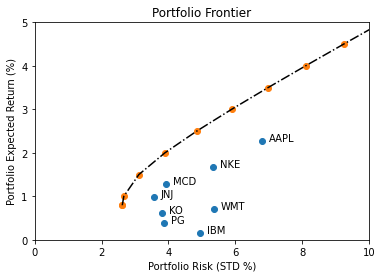

In [32]:
#Plot of Portfolio Efficient Frontier
plt.scatter(rtns.std() * 100, rtns.mean() * 100)
plt.scatter(portstd, portmu)
plt.plot(portstd, portmu, linestyle='-.', color='black')
plt.title('Portfolio Frontier')
plt.xlim([0,10])
plt.ylim([0,5])
for x, y, ticker in zip(rtns.std()*100,rtns.mean()*100,rtns.mean().index):
    plt.text(x+0.2, y, ticker, ha='left')
plt.xlabel('Portfolio Risk (STD %)')
plt.ylabel('Portfolio Expected Return (%)')
plt.show()